# Calculation of electrons and holes mobility in superconductors

In [218]:
%matplotlib notebook

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import seaborn as sns
from scipy.interpolate import interp1d
from scipy import interpolate
from matplotlib.pyplot import cm
mpl.rc('figure', max_open_warning = 0)
import math
from matplotlib.ticker import AutoMinorLocator

## Measurement of Hall voltage as a function of temperature

In [248]:
df_H = np.genfromtxt('202220513b-20220513a-20211027-RH-T.dat', delimiter=',', skip_header=32)

## Measurement of resistivity as a function of temperature

In [269]:
df_R = np.genfromtxt('20220513A-R vs T.dat', delimiter=',', skip_header=32)

In [283]:
RH9T = df_R[np.where(df_R[:,4]>1000)]
RH0T = np.flip(df_R[np.where((df_R[:,4]<1000) & (df_R[:,3]>=50))], axis=0)

df = np.concatenate((RH9T,RH0T),axis=0)

## Resistance vs. T

<IPython.core.display.Javascript object>


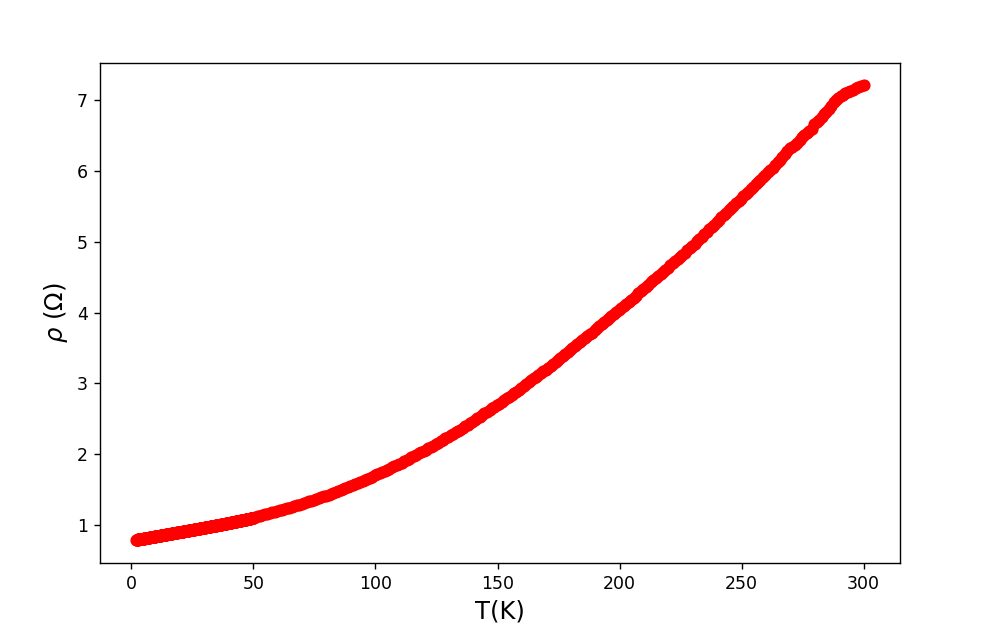

Text(0, 0.5, '$\\rho$ ($\\Omega$)')

In [300]:
fig = plt.figure(figsize=(8,5))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
axe.plot(df[:,3],df[:,6],'o', color='r')
axe.set_xlabel('T(K)',size=14,color='black')
axe.set_ylabel(r'$\rho$ ($\Omega$)',size=14,color='k')

In [284]:
Temperature = np.unique(np.round(df_H[:,3],1))

# $\alpha = \frac{1}{e\rho}$

In [286]:
alpha = []
for i in Temperature:
    alpha.append(1/(np.average(df[np.where((df[:,3]>i-0.5) & (df[:,3]<i+0.5))][:,6])))
    

In [287]:
alpha = np.array(alpha)/21.76e-27

<IPython.core.display.Javascript object>


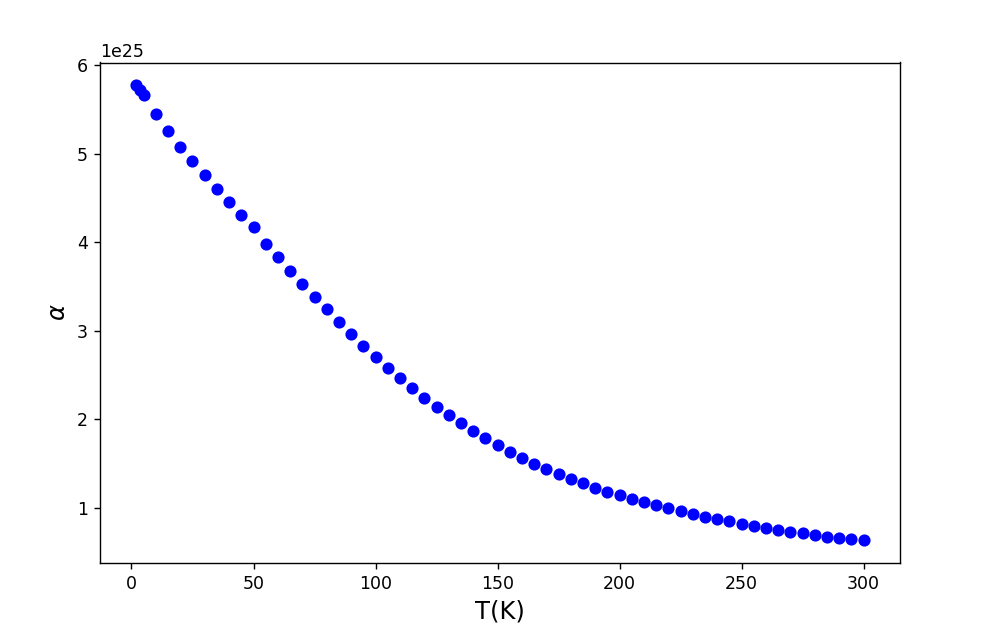

Text(0, 0.5, '$\\alpha$')

In [293]:
fig = plt.figure(figsize=(8,5))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
axe.plot(Temperature,alpha,'o', color='b')
axe.set_xlabel('T(K)',size=14,color='black')
axe.set_ylabel(r'$\alpha$',size=14,color='black')


## Hall vs. T

In [255]:
RH = ((df_H[np.where (df_H[:,4]>1000)][:,8]) - (df_H[np.where (df_H[:,4]<-1000)][:,8]))*6.1*1e-9

<IPython.core.display.Javascript object>


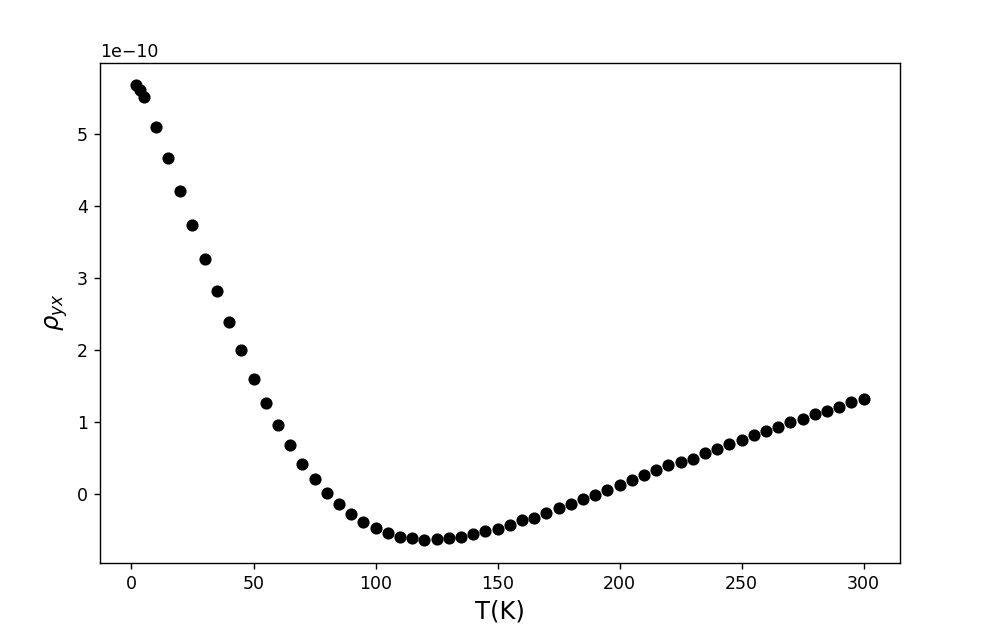

Text(0, 0.5, '$\\rho_{yx}$')

In [304]:
fig = plt.figure(figsize=(8,5))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
axe.plot(Temperature,RH,'o', color='k')
axe.set_xlabel('T(K)',size=14,color='black')
axe.set_ylabel(r'$\rho_{yx}$',size=14,color='black')

## $\beta = \frac{\alpha}{e\rho^{2}}$

In [305]:
beta = (RH * (np.square(alpha)))*1.6e-19

<IPython.core.display.Javascript object>


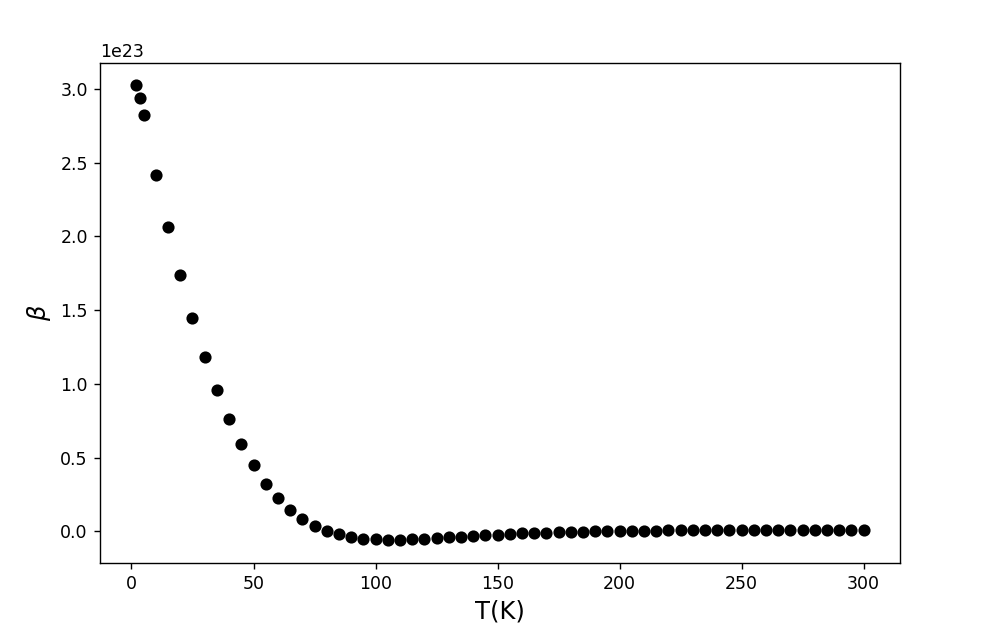

Text(0, 0.5, '$\\beta$')

In [307]:
fig = plt.figure(figsize=(8,5))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
axe.plot(Temperature,beta,'o', color='k')
axe.set_xlabel('T(K)',size=14,color='black')
axe.set_ylabel(r'$\beta$',size=14,color='black')

In [260]:
n = 3.7e27
p = 1.6e27

a = alpha
b = beta

## Mobility of holes vs. T

In [308]:
mu_p=(((-2*a*p)/n)+np.sqrt(np.square(2*a*p/n)+4*p*(1-(p/n))*(((np.square(a))/n)+b)))/(2*p*(1-(p/n)))

<IPython.core.display.Javascript object>


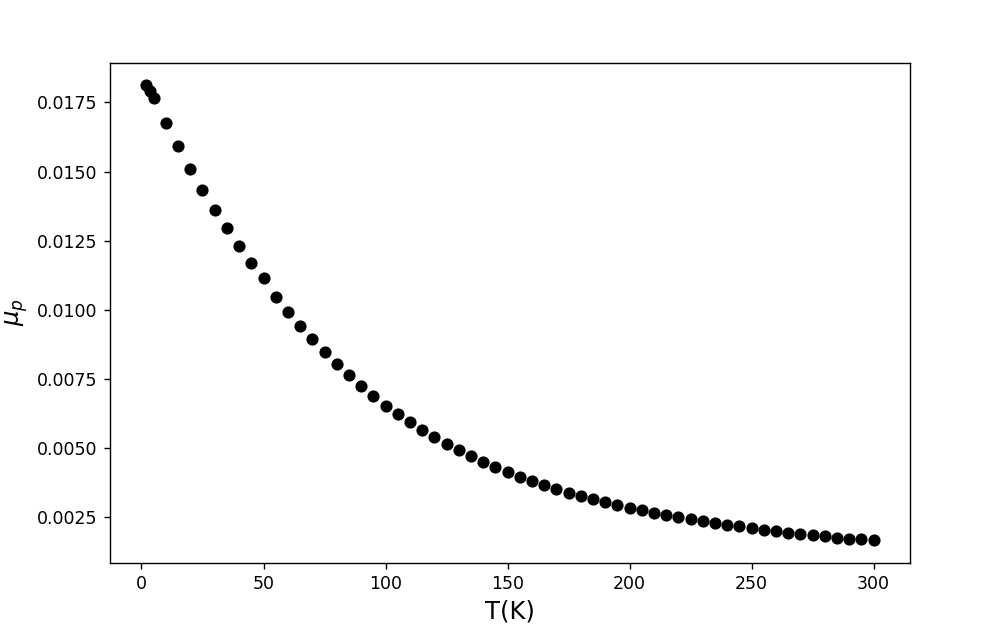

Text(0, 0.5, '$\\mu_{p}$')

In [312]:
fig = plt.figure(figsize=(8,5))
axe = fig.add_axes([0.11,0.1,0.8,0.8])
axe.plot(Temperature,mu_p,'o', color='k')
axe.set_xlabel('T(K)',size=14,color='black')
axe.set_ylabel(r'$\mu_{p}$',size=14,color='black')

## Mobility of electrons vs. T

In [313]:
n = 3.7e27
p = 1.6e27
mu_n = ((alpha-p*(np.array(mu_p)))/n)

<IPython.core.display.Javascript object>


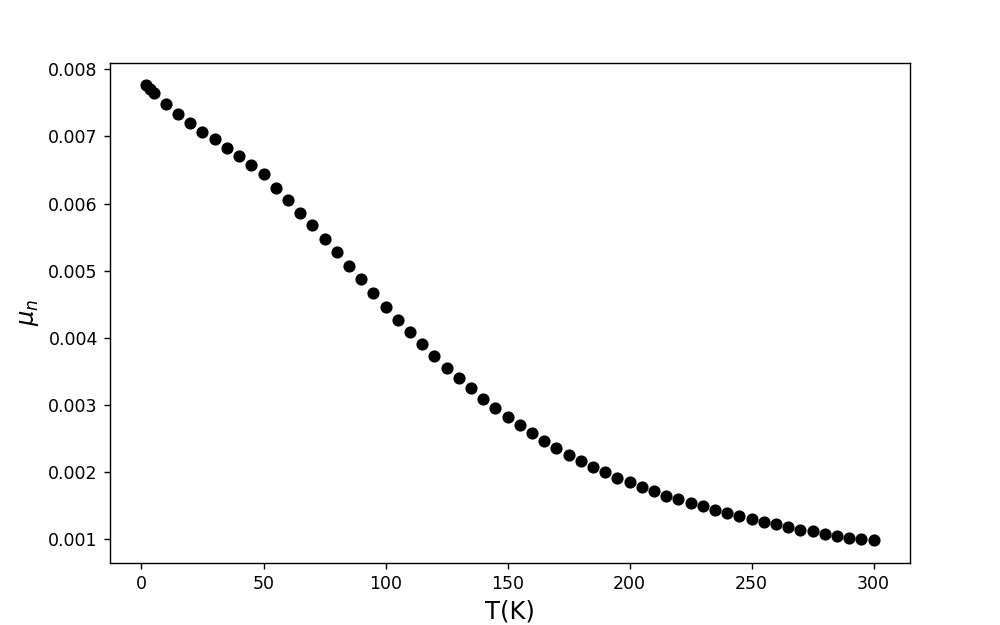

Text(0, 0.5, '$\\mu_{n}$')

In [314]:
fig = plt.figure(figsize=(8,5))
axe = fig.add_axes([0.11,0.1,0.8,0.8])
axe.plot(Temperature,mu_n,'o', color='k')
axe.set_xlabel('T(K)',size=14,color='black')
axe.set_ylabel(r'$\mu_{n}$',size=14,color='black')

<IPython.core.display.Javascript object>


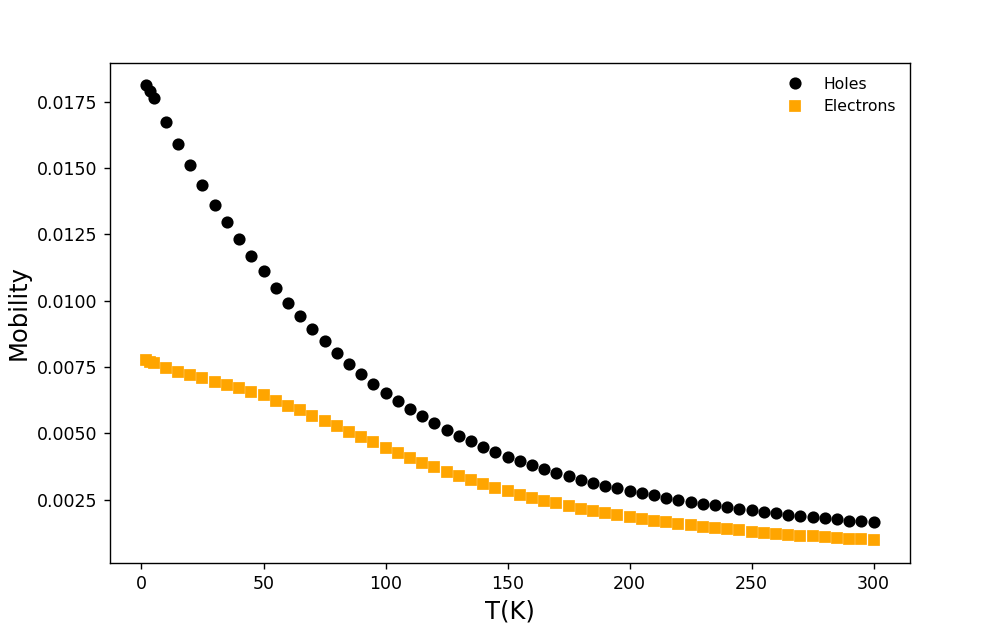

In [321]:
fig = plt.figure(figsize=(8,5))
axe = fig.add_axes([0.11,0.1,0.8,0.8])
axe.plot(Temperature,mu_p,'o', color='k', label= 'Holes')
axe.plot(Temperature,mu_n,'s', color='orange', label='Electrons')
axe.set_xlabel('T(K)',size=14,color='black')
axe.set_ylabel('Mobility',size=14,color='black')
axe.legend(prop={'size': 9}, loc='upper right', frameon=False)